In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [5]:
# code settings
pd.set_option('display.max_columns', None)

# visualization settings
plt.rc('figure', figsize=(9,9))
sns.set_style('darkgrid')

In order to determine which test to use, must determine if the data is normally distributed

- We'll default to a shapiro-wilk test and K^2 test

In [19]:
regression_short = pd.read_csv('../data/processed/regression_short.csv')

Statistical Test:

- Regression
- Pearson's correlation
- ANOVA

In [20]:
regression_short.head(10)

,state,state_FOODINSEC_10_12,state_FOODINSEC_13_15,state_LACCESS_POP15,state_LACCESS_LOWI15,state_MEDHHINC15,state_GROCPTH14
0,AL,17.9,17.6,7708.624532,2241.191144,59520.448276,0.729979
1,AK,12.1,13.3,14371.804328,5651.092540,39830.104478,0.185682
2,AZ,19.7,19.2,7838.947589,3399.598632,38592.680000,0.185442
3,AR,14.9,14.9,83623.853433,32146.580382,44016.733333,0.152614
4,CA,15.6,12.6,74540.508724,21137.059263,57650.931034,0.270533
5,CO,14.1,12.1,14762.883231,4292.254913,53810.531250,0.412806
6,CT,13.4,13.1,129233.283214,19404.683318,72445.125000,0.198947
7,DE,12.0,13.2,12688.280100,4728.931789,73115.000000,0.300504
8,DC,11.6,11.9,58462.083833,13991.578900,58722.000000,0.180435
9,FL,14.8,12.7,59500.003178,20115.857235,45390.358209,0.172966


In [44]:
def test_normality(df, feat_col):
    
    alpha = 0.05
    
    sns.kdeplot(df[feat_col], label=feat_col)
    plt.show()
    
    # Shapiro-Wilk test
    stat_sw, p_sw = stats.shapiro(df[feat_col])
    
    print('Sharpio-Wilk Test:\nStatistic=%.4f, p=%.4f' % (stat_sw, p_sw))
    
    if p_sw > alpha:
        print('Fail to reject H0, normally distributed')
    else:
        print('Reject H0, not normally distributed')
        
    # D'Agostino K^2
    stat_da, p_da = stats.normaltest(df[feat_col])
    
    print('\nD\'Agostino Test:\nStatistic=%.4f, p=%.4f' % (stat_sw, p_sw))
    
    if p_da > alpha:
        print('Fail to reject H0, normally distributed')
    else:
        print('Reject H0, not normally distributed')

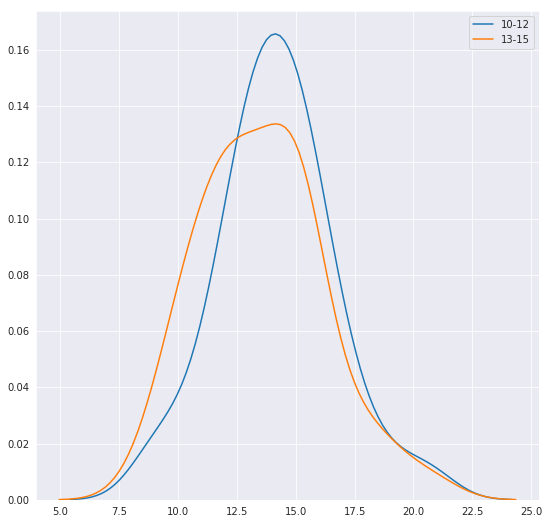

In [24]:
sns.kdeplot(regression_short['state_FOODINSEC_10_12'], label='10-12')
sns.kdeplot(regression_short['state_FOODINSEC_13_15'], label='13-15')
plt.legend()

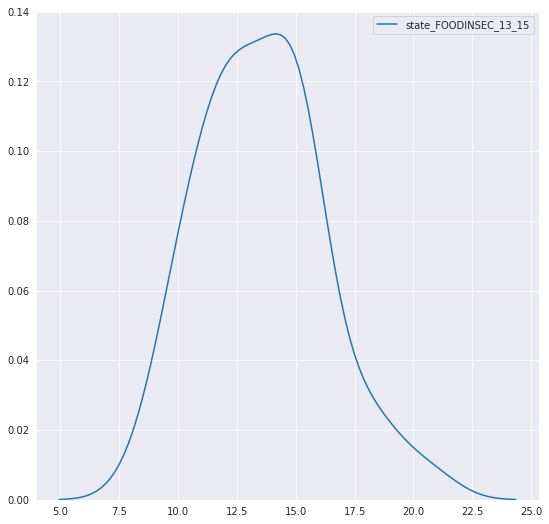

Sharpio-Wilk Test:
Statistic=0.9777, p=0.4450
Fail to reject H0, normally distributed

D'Agostino Test:
Statistic=0.9777, p=0.4450
Fail to reject H0, normally distributed


In [45]:
test_normality(regression_short, 'state_FOODINSEC_13_15')

Difference between food insecurity

- Parametric, 2 groups -> Paired t-test
- Means
- Did variance change too?

In [50]:
stat, p = stats.ttest_rel(regression_short['state_FOODINSEC_10_12'],
                          regression_short['state_FOODINSEC_13_15'])


stat, p

(2.878865632380211, 0.005858791185468704)